In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import prior_box as pb

img_w, img_h = 300, 300

In [3]:
def draw_boxes(img_w, img_h, prior_boxes, log=False):
    print('Drawing {} boxes'.format(len(prior_boxes)))
    
    img = np.zeros((img_w,img_h,3), np.uint8)
    img[:,:] = (255,255,255)

    for box, idx in zip(prior_boxes, range(0, len(prior_boxes))):
        xmin = int(box[0] * img_w)
        ymin = int(box[1] * img_h)
        xmax = int(box[2] * img_w)
        ymax = int(box[3] * img_h)

        cv2.rectangle(img,(xmin,ymin), (xmax,ymax), ((idx + 1)/(len(prior_boxes)) * 255,0,0), 1)
        if log:
            print('({},{}), ({}, {})'.format(xmin,ymin,xmax,ymax))

    plt.figure(figsize=(24,12))
    plt.imshow(img)

In [4]:
config_1x1 = [
    {'layer_width':  1, 'layer_height':  1, 'num_prior': 6,
     'min_size': 276.0, 'max_size': 330.0, 'aspect_ratios': [1.0, 1.0, 2.0, 1/2.0, 3.0, 1/3.0]},
]

config_3x3 = [
    {'layer_width':  3, 'layer_height':  3, 'num_prior': 6,
     'min_size': 222.0, 'max_size': 276.0, 'aspect_ratios': [1.0, 1.0, 2.0, 1/2.0, 3.0, 1/3.0]}
]

config_10x10 = [
    {'layer_width': 10, 'layer_height': 10, 'num_prior': 6,
     'min_size': 114.0, 'max_size': 168.0, 'aspect_ratios': [1.0, 1.0, 2.0, 1/2.0, 3.0, 1/3.0]}
]

prior_boxes_1x1 = pb.create_prior_boxes_vect(img_w, img_h, config_1x1, pb.default_prior_variance)
prior_boxes_3x3 = pb.create_prior_boxes_vect(img_w, img_h, config_3x3, pb.default_prior_variance)
prior_boxes_10x10 = pb.create_prior_boxes_vect(img_w, img_h, config_10x10, pb.default_prior_variance)


Drawing 6 boxes


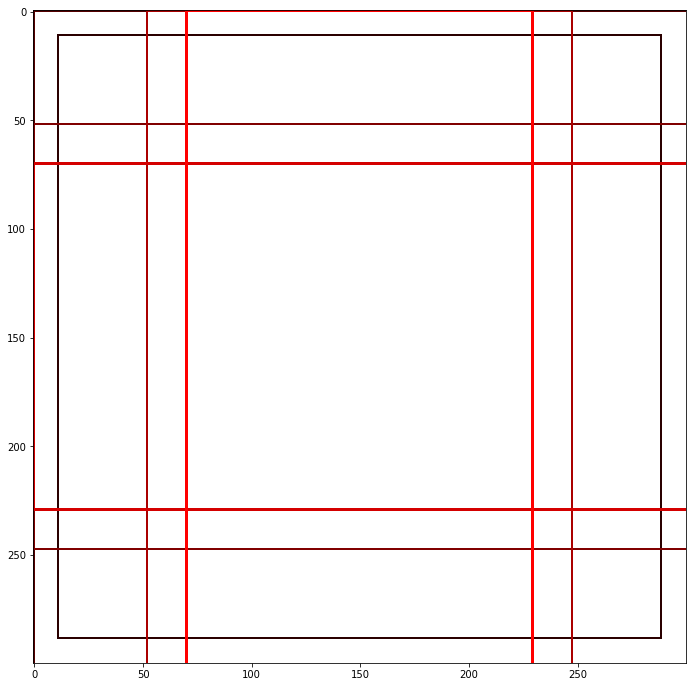

In [5]:
draw_boxes(img_w, img_h, prior_boxes_1x1)

Drawing 5 boxes


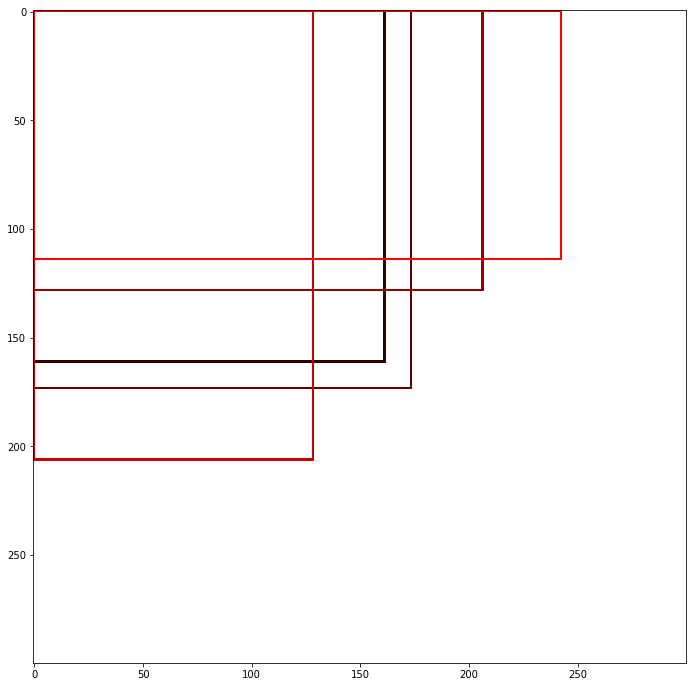

In [6]:
draw_boxes(img_w, img_h, prior_boxes_3x3[:5])

Drawing 5 boxes


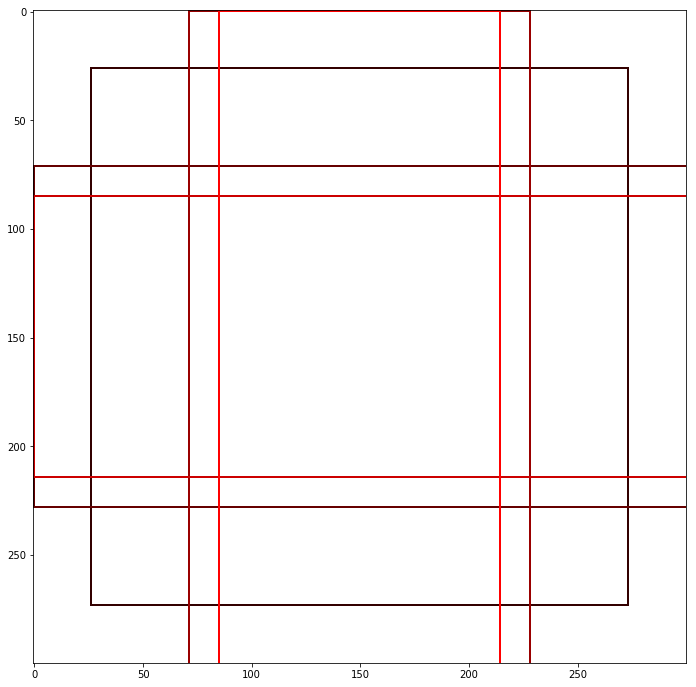

In [7]:
draw_boxes(img_w, img_h, prior_boxes_3x3[25:30])

Drawing 5 boxes


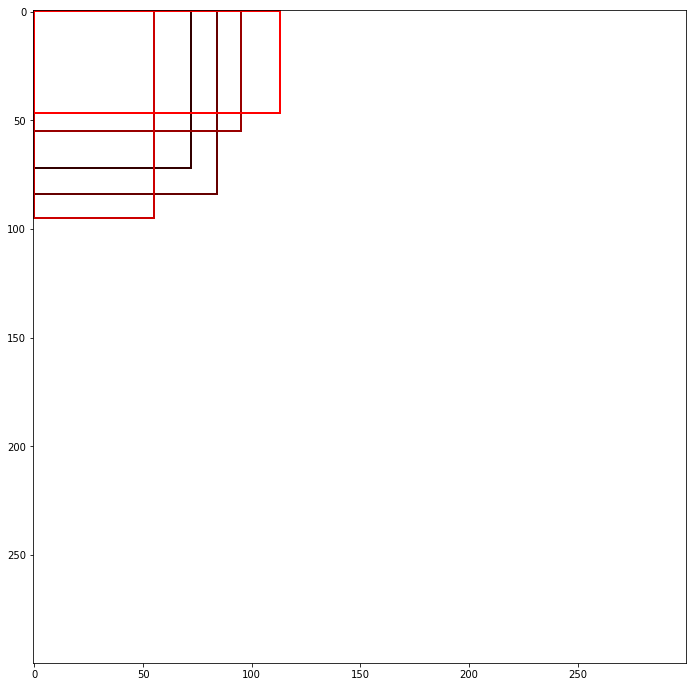

In [8]:
draw_boxes(img_w, img_h, prior_boxes_10x10[:5])

Drawing 5 boxes


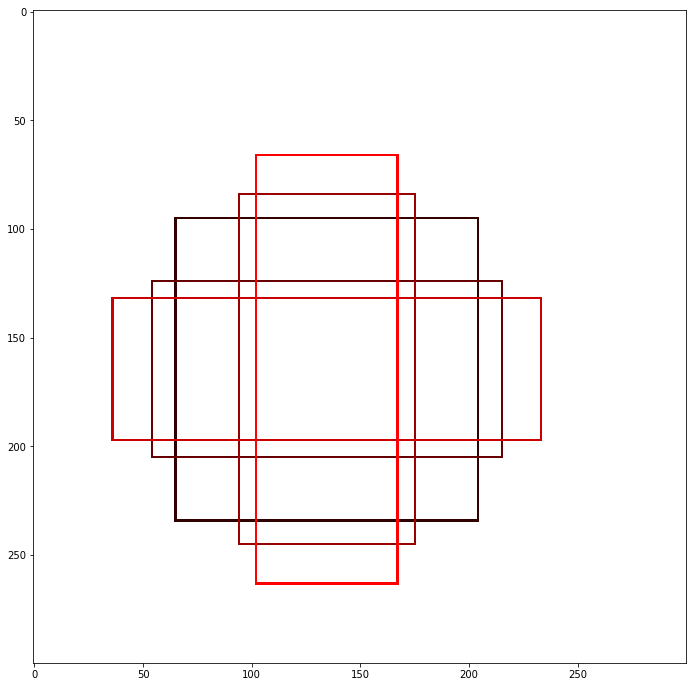

In [9]:
draw_boxes(img_w, img_h, prior_boxes_10x10[325:330])